In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Formatting Data and plotting

In [3]:
df = pd.read_csv("data2_19.csv")
df

,"D,X1,X2,X3,X4,X5,X6"
0,"0,3,3,3,4,2,4"
1,"0,3,2,3,5,4,3"
2,"1,5,3,3,3,3,5"
3,"0,5,4,3,3,3,5"
4,"0,5,4,3,3,3,5"
...,...
124,"1,5,2,4,4,2,3"
125,"0,5,3,3,4,4,5"
126,"0,5,3,3,4,4,4"
127,"0,3,2,3,3,5,4"


In [4]:
data = pd.DataFrame()
data["y"]=[int(df["D,X1,X2,X3,X4,X5,X6"][i][0]) for i in range(len(df["D,X1,X2,X3,X4,X5,X6"]))]
data["x1"]=[int(df["D,X1,X2,X3,X4,X5,X6"][i][2]) for i in range(len(df["D,X1,X2,X3,X4,X5,X6"]))]
data["x2"]=[int(df["D,X1,X2,X3,X4,X5,X6"][i][4]) for i in range(len(df["D,X1,X2,X3,X4,X5,X6"]))]
data["x3"]=[int(df["D,X1,X2,X3,X4,X5,X6"][i][6]) for i in range(len(df["D,X1,X2,X3,X4,X5,X6"]))]
data["x4"]=[int(df["D,X1,X2,X3,X4,X5,X6"][i][8]) for i in range(len(df["D,X1,X2,X3,X4,X5,X6"]))]
data["x5"]=[int(df["D,X1,X2,X3,X4,X5,X6"][i][10]) for i in range(len(df["D,X1,X2,X3,X4,X5,X6"]))]
data["x6"]=[int(df["D,X1,X2,X3,X4,X5,X6"][i][12]) for i in range(len(df["D,X1,X2,X3,X4,X5,X6"]))]

array([[<Axes: title={'center': 'y'}>, <Axes: title={'center': 'x1'}>,
        <Axes: title={'center': 'x2'}>],
       [<Axes: title={'center': 'x3'}>, <Axes: title={'center': 'x4'}>,
        <Axes: title={'center': 'x5'}>],
       [<Axes: title={'center': 'x6'}>, <Axes: >, <Axes: >]], dtype=object)

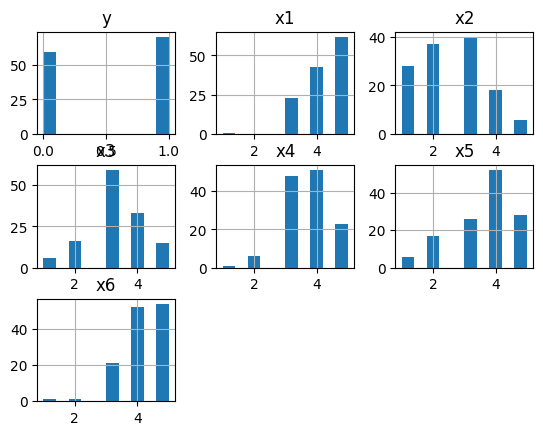

In [5]:
data.hist()

#### Calculating _Prior Probability_ and Creating function for predicting on test data

In [6]:
count_0 = len(data[data["y"]==0])/len(data)
count_1 = len(data[data["y"]==1])/len(data)
print(count_0," ",count_1)

0.4573643410852713   0.5426356589147286


In [7]:
##  for predicting, simply counting values from data (training data) and multiplying with prior probability

cols = list(data.columns)
def predict(x):

    data_0 = data[data["y"]==0]
    data_1 = data[data["y"]==1]
    cnt_0 = len(data_0)
    cnt_1 = len(data_1)

    post_0=count_0
    for i in range(6):
        post_0 *= len(data_0[data_0[cols[i+1]]==x[i]])/cnt_0
    
    post_1=count_1
    for i in range(6):
        post_1 *= len(data_1[data_1[cols[i+1]]==x[i]])/cnt_1

    print(post_0,post_1)
    if post_0>post_1:
        return 0
    else:
        return 1
    

In [8]:
df_test = pd.read_csv("test2_19.csv")

test = pd.DataFrame()
test["y"]=pd.DataFrame([int(df_test["D,X1,X2,X3,X4,X5,X6"][i][0]) for i in range(len(df_test["D,X1,X2,X3,X4,X5,X6"]))])
test["x1"]=pd.DataFrame([int(df_test["D,X1,X2,X3,X4,X5,X6"][i][2]) for i in range(len(df_test["D,X1,X2,X3,X4,X5,X6"]))])
test["x2"]=pd.DataFrame([int(df_test["D,X1,X2,X3,X4,X5,X6"][i][4]) for i in range(len(df_test["D,X1,X2,X3,X4,X5,X6"]))])
test["x3"]=pd.DataFrame([int(df_test["D,X1,X2,X3,X4,X5,X6"][i][6]) for i in range(len(df_test["D,X1,X2,X3,X4,X5,X6"]))])
test["x4"]=pd.DataFrame([int(df_test["D,X1,X2,X3,X4,X5,X6"][i][8]) for i in range(len(df_test["D,X1,X2,X3,X4,X5,X6"]))])
test["x5"]=pd.DataFrame([int(df_test["D,X1,X2,X3,X4,X5,X6"][i][10]) for i in range(len(df_test["D,X1,X2,X3,X4,X5,X6"]))])
test["x6"]=pd.DataFrame([int(df_test["D,X1,X2,X3,X4,X5,X6"][i][12]) for i in range(len(df_test["D,X1,X2,X3,X4,X5,X6"]))])

test = test.values

In [9]:
l_pred=[]
l_actual=[]
for i in test:
    l_pred.append(predict(i[1:]))
    l_actual.append(i[0])

0.00019544466418378617 0.0021564104657389436
0.00014187834881489666 0.0014306954051537216
4.7380524650614827e-05 0.0010136972274841184
1.1242042428222995e-05 4.339277239134857e-07
1.6921615946648154e-05 0.00027953469000319635
0.0018394791923179877 0.0011506833393062964
0.0 0.0
4.0986613019562985e-05 2.3910303154416544e-06
0.0006485867374395275 0.0005370478247574031
0.0 4.6461122926355436e-05
0.00028191412167115825 0.0010597743741879422
0.0008860158109664974 0.0038013646030654446
0.0013029644278919079 0.0015205458412261774
2.84283147903689e-05 0.00042575283554332973


#### Test Result

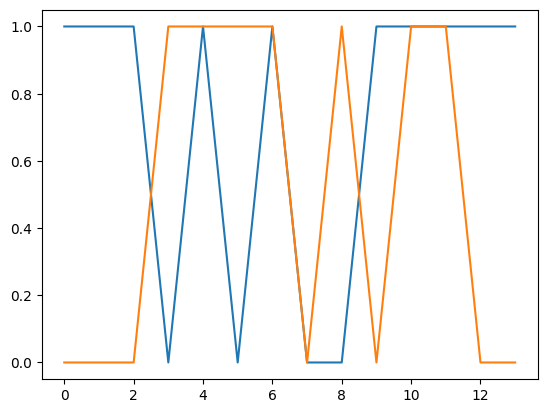

In [10]:
plt.plot([i for  i in range(len(l_pred))], l_pred)
plt.plot([i for  i in range(len(l_pred))], l_actual)

In [13]:
print(l_actual)
print(l_pred)

from sklearn.metrics import confusion_matrix
print("confusion_matrix :")
print(confusion_matrix(l_actual, l_pred))

[0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0]
[1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1]
confusion_matrix :
[[1 6]
 [3 4]]
